In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px;

## Séries históricas disponíveis em
## http://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/
arquivo_bovespa = (r'C:\Users\kenny\Documents\Projeto CDIA\actions-price-analysis-main\COTAHIST_M102022.txt')


## Estrutura do arquivo disponível em 
## http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf
tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

dados_acoes=pd.read_fwf(arquivo_bovespa, widths=tamanho_campos, header=0)

In [233]:
## Nomear as colunas

dados_acoes.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes["data_pregao"])
dados_acoes=dados_acoes.drop(linha-1)

# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for coluna in listaVirgula:
    dados_acoes[coluna]=[i/100. for i in dados_acoes[coluna]]

In [234]:
dados_acoes.drop(["moeda_referencia"], axis=1, inplace=True)

In [235]:
dados_acoes["empresa"].value_counts()

PETRE           10027
VALEE            6220
PETR             4858
BBASE            3892
MGLUE            3198
                ...  
THE JM SMUCK        1
FII JASC REN        1
BUMBLE INC          1
WEC ENERGY G        1
PPL CORP            1
Name: empresa, Length: 2176, dtype: int64

In [236]:
dados_acoes

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,empresa,especificacao_papel,prazo_dias_merc_termo,preco_abertura,preco_maximo,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,20221003,2.0,ELMD3,10,ELETROMIDIA,ON NM,NaN,10.80,11.73,...,680.0,216300.0,2469914.0,0.00,0.0,99991231.0,1.0,0.0,BRELMDACNOR3,100.0
1,1,20221003,2.0,OFSA3,10,OUROFINO S/A,ON NM,NaN,23.17,23.17,...,37.0,7300.0,166458.0,0.00,0.0,99991231.0,1.0,0.0,BROFSAACNOR7,114.0
2,1,20221003,2.0,SMFT3,10,SMART FIT,ON NM,NaN,15.68,16.60,...,8482.0,1950600.0,31486931.0,0.00,0.0,99991231.0,1.0,0.0,BRSMFTACNOR1,109.0
3,1,20221003,2.0,HOME34,10,HOME DEPOT,DRN,NaN,52.53,52.84,...,494.0,27860.0,1467963.7,0.00,0.0,99991231.0,1.0,0.0,BRHOMEBDR002,143.0
4,1,20221003,2.0,BRGE3,10,ALFA CONSORC,ON,NaN,9.95,9.95,...,2.0,200.0,1912.0,0.00,0.0,99991231.0,1.0,0.0,BRBRGEACNOR6,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,1,20221018,78.0,ITSAI99,70,ITSA,PN N1,0.0,2.37,2.37,...,1.0,1000.0,2370.0,9.06,0.0,20230915.0,1.0,0.0,BRITSAACNPR7,412.0
181802,1,20221019,78.0,ITSAI99,70,ITSA,PN N1,0.0,2.43,2.43,...,3.0,1500.0,3639.0,9.06,0.0,20230915.0,1.0,0.0,BRITSAACNPR7,412.0
181803,1,20221021,78.0,ITSAI99,70,ITSA,PN N1,0.0,2.68,2.68,...,1.0,500.0,1340.0,9.06,0.0,20230915.0,1.0,0.0,BRITSAACNPR7,412.0
181804,1,20221024,78.0,ITSAI99,70,ITSA,PN N1,0.0,2.59,2.59,...,1.0,1000.0,2590.0,9.06,0.0,20230915.0,1.0,0.0,BRITSAACNPR7,412.0


In [237]:
empresa_1 = dados_acoes[dados_acoes["empresa"] == "PETRE"]

In [238]:
empresa_1

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,empresa,especificacao_papel,prazo_dias_merc_termo,preco_abertura,preco_maximo,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
56292,1,20221004,82.0,PETRW358,80,PETRE,ON N2,0.0,0.48,0.48,...,15.0,7500.0,3597.0,29.18,0.0,20221118.0,1.0,0.0,BRPETRACNOR9,196.0
56293,1,20221005,82.0,PETRW358,80,PETRE,ON N2,0.0,0.48,0.48,...,2.0,2000.0,900.0,29.18,0.0,20221118.0,1.0,0.0,BRPETRACNOR9,196.0
56294,1,20221006,82.0,PETRW358,80,PETRE,ON N2,0.0,0.36,0.36,...,3.0,6000.0,1530.0,29.18,0.0,20221118.0,1.0,0.0,BRPETRACNOR9,196.0
56295,1,20221007,82.0,PETRW358,80,PETRE,ON N2,0.0,0.23,0.29,...,17.0,15200.0,3775.0,29.18,0.0,20221118.0,1.0,0.0,BRPETRACNOR9,196.0
56296,1,20221011,82.0,PETRW358,80,PETRE,ON N2,0.0,0.30,0.30,...,1.0,3000.0,900.0,29.18,0.0,20221118.0,1.0,0.0,BRPETRACNOR9,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180713,1,20221026,78.0,PETRK822,70,PETRE,PN N2,0.0,24.17,25.10,...,12.0,1200.0,29424.0,8.22,0.0,20221118.0,1.0,0.0,BRPETRACNPR6,204.0
180714,1,20221028,78.0,PETRK822,70,PETRE,PN N2,0.0,24.39,24.39,...,5.0,500.0,12087.0,8.22,0.0,20221118.0,1.0,0.0,BRPETRACNPR6,204.0
180715,1,20221031,78.0,PETRK822,70,PETRE,PN N2,0.0,22.12,22.12,...,3.0,300.0,6534.0,8.22,0.0,20221118.0,1.0,0.0,BRPETRACNPR6,204.0
180721,1,20221013,78.0,PETRC374,70,PETRE,PN N2,0.0,2.67,2.67,...,1.0,10000.0,26700.0,37.52,0.0,20230317.0,1.0,0.0,BRPETRACNPR6,204.0


In [239]:
empresa_1["preco_ultimo_negocio"].median()

1.7

In [240]:
empresa_1["preco_ultimo_negocio"].std()

5.729423534281389

In [241]:
empresa_1["preco_ultimo_negocio"].mean()

4.105725541039188

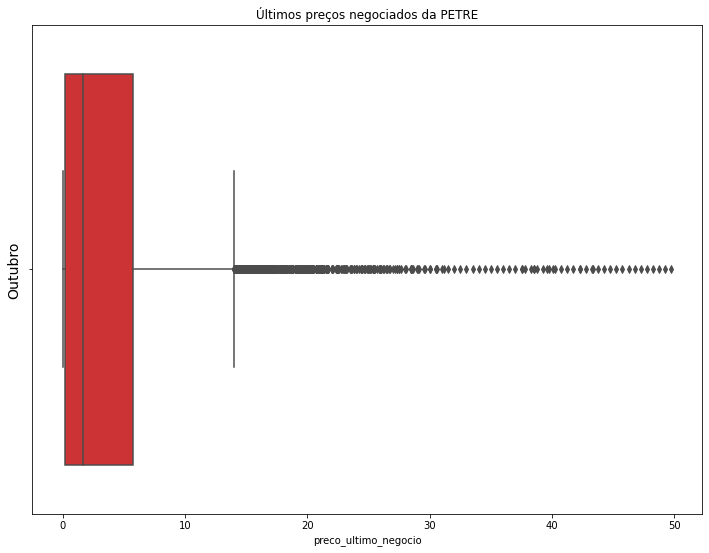

In [242]:
boxplot_empresa1_precoultimo_plt = sns.boxplot(x=empresa_1["preco_ultimo_negocio"]) # colocando o boxplot numa variável para manipular melhor
boxplot_empresa1_precoultimo_plt.set_ylabel('Outubro', fontsize=14) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

boxplot_empresa1_precoultimo_plt.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

# em R$ - Reais
plt.title('Últimos preços negociados da PETRE') # O título que se deseja colocar acima do gráfico

plt.show() # Impressão do gráfico

In [243]:
empresa_1["volume_total_negociado"].std()

6105593.487115126

In [244]:
empresa_1["volume_total_negociado"].mean()

710625.8090156578

In [245]:
empresa_1["volume_total_negociado"].median()

38973.0

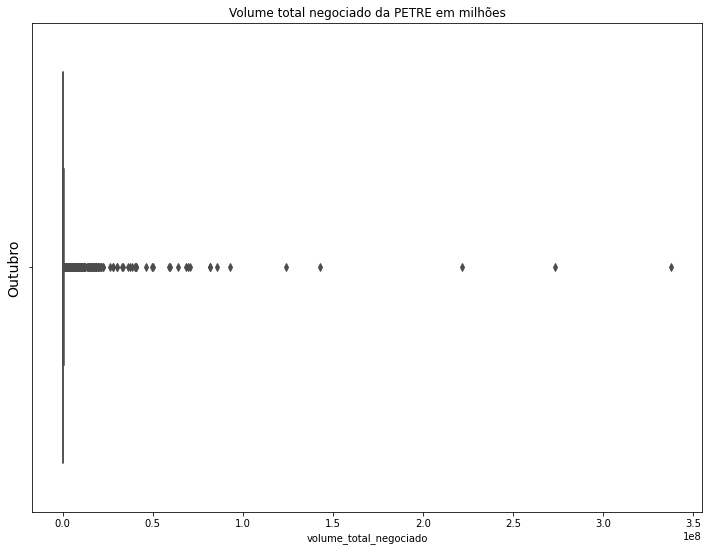

In [246]:
boxplot_empresa1_volumetotal_plt = sns.boxplot(x=empresa_1["volume_total_negociado"])
boxplot_empresa1_volumetotal_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_volumetotal_plt.plot()


plt.title('Volume total negociado da PETRE em milhões')

plt.show()

In [247]:
empresa_1["numero_negocios"].std()

384.47835617497776

In [248]:
empresa_1["numero_negocios"].mean()

124.9536252119278

In [249]:
empresa_1["numero_negocios"].median()

13.0

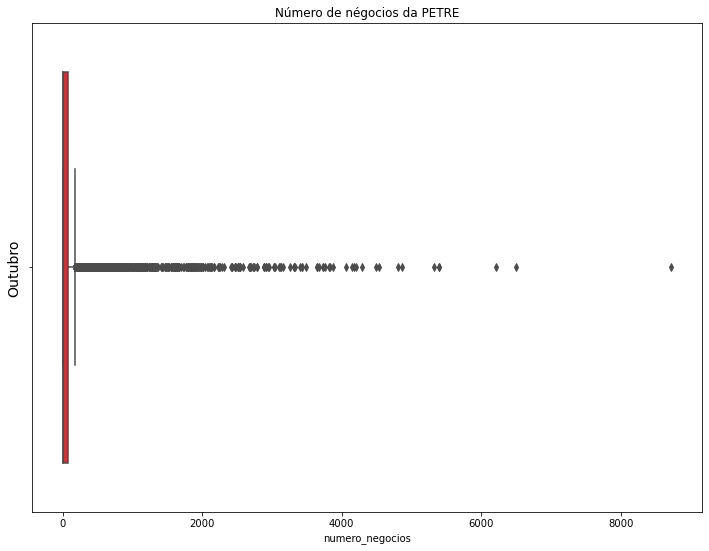

In [250]:
boxplot_empresa1_numeronegocios_plt = sns.boxplot(x=empresa_1["numero_negocios"])
boxplot_empresa1_numeronegocios_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_numeronegocios_plt.plot()


plt.title('Número de négocios da PETRE')

plt.show()

In [251]:
empresa_1["preco_maximo"].std()

5.776885233995972

In [252]:
empresa_1["preco_maximo"].mean()

4.266220205445284

In [253]:
empresa_1["preco_maximo"].median()

1.9

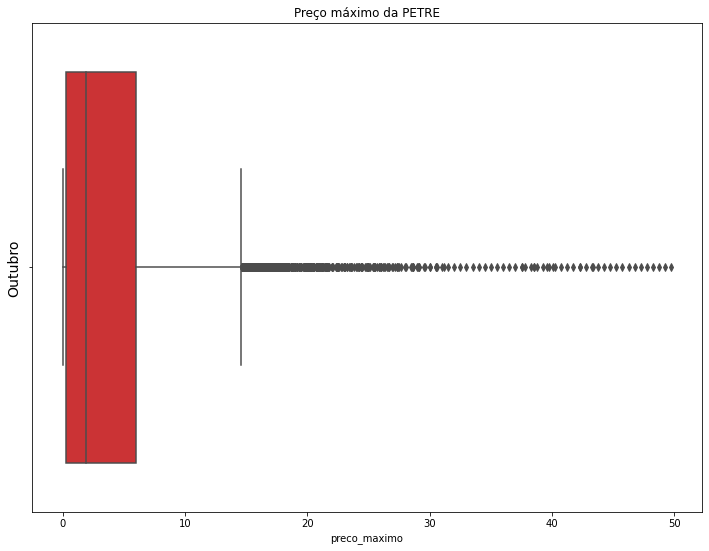

In [254]:
boxplot_empresa1_maximo_plt = sns.boxplot(x = empresa_1["preco_maximo"])
boxplot_empresa1_maximo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_maximo_plt.plot()


plt.title('Preço máximo da PETRE') # em R$ - Reais

plt.show()

In [255]:
empresa_1["preco_minimo"].std()

5.660947624318481

In [256]:
empresa_1["preco_minimo"].mean()

3.928716465543032

In [257]:
empresa_1["preco_minimo"].median()

1.5

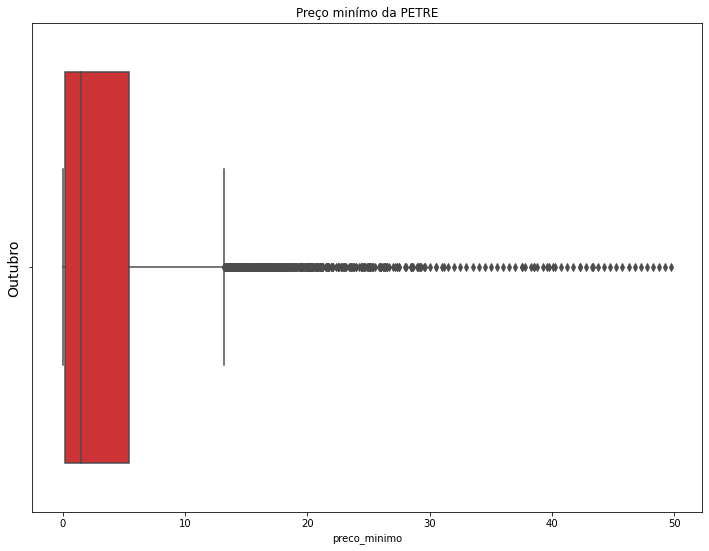

In [258]:
boxplot_empresa1_minimo_plt = sns.boxplot(x = empresa_1["preco_minimo"])
boxplot_empresa1_minimo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_minimo_plt.plot()


plt.title('Preço minímo da PETRE') # em R$ - Reais

plt.show()

In [259]:
empresa_1["preco_abertura"].std()

5.707135405067795

In [260]:
empresa_1["preco_abertura"].mean()

4.093392839333776

In [261]:
empresa_1["preco_abertura"].median()

1.71

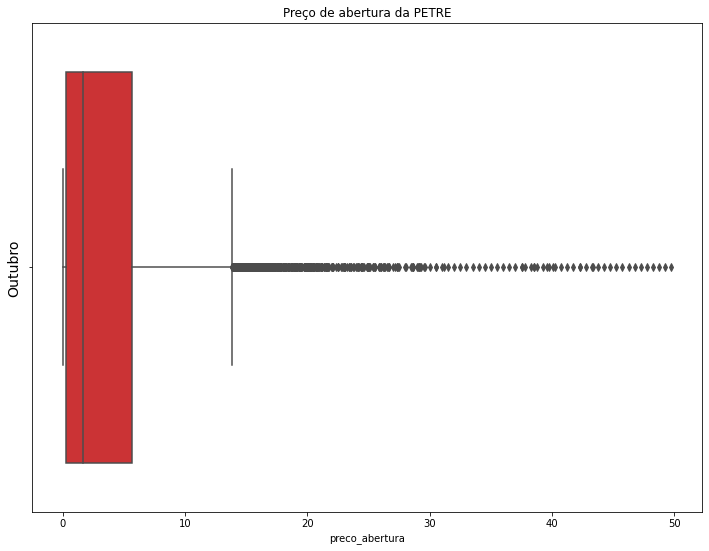

In [262]:
boxplot_empresa1_abertura_plt = sns.boxplot(x = empresa_1["preco_abertura"])
boxplot_empresa1_abertura_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_abertura_plt.plot()


plt.title('Preço de abertura da PETRE') # em R$ - Reais

plt.show()

In [263]:
empresa_1[["preco_abertura", "preco_ultimo_negocio","preco_minimo","preco_maximo","numero_negocios","volume_total_negociado"]].corr()

,preco_abertura,preco_ultimo_negocio,preco_minimo,preco_maximo,numero_negocios,volume_total_negociado
preco_abertura,1.000000,0.997253,0.998526,0.998428,-0.109370,0.207455
preco_ultimo_negocio,0.997253,1.000000,0.998425,0.998670,-0.111930,0.206519
preco_minimo,0.998526,0.998425,1.000000,0.997138,-0.119470,0.207331
preco_maximo,0.998428,0.998670,0.997138,1.000000,-0.102856,0.206406
numero_negocios,-0.109370,-0.111930,-0.119470,-0.102856,1.000000,0.146719
volume_total_negociado,0.207455,0.206519,0.207331,0.206406,0.146719,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='preco_abertura', ylabel='preco_ultimo_negocio'>

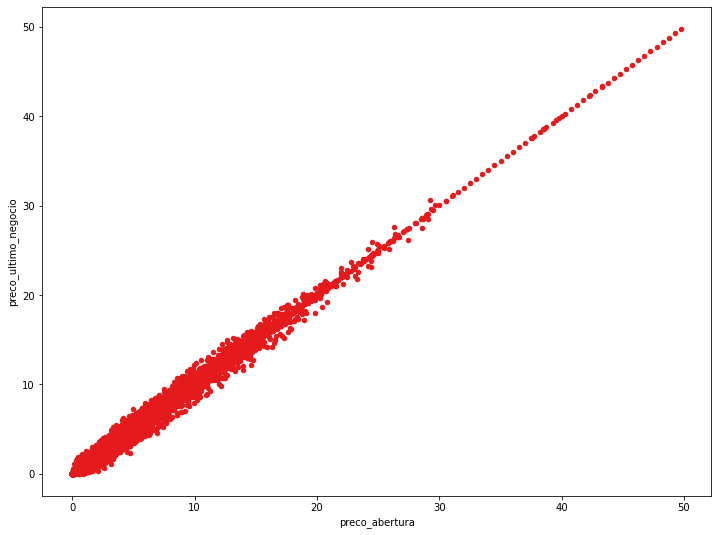

In [264]:
empresa_1.plot.scatter(x="preco_abertura",y="preco_ultimo_negocio")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='numero_negocios', ylabel='volume_total_negociado'>

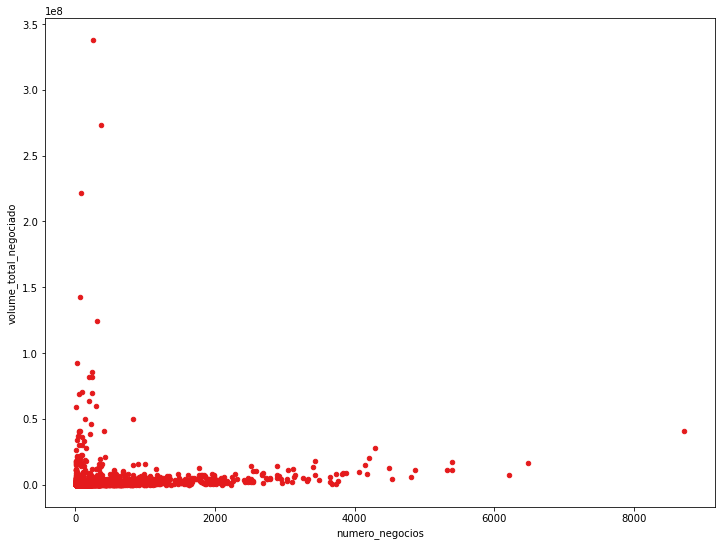

In [265]:
empresa_1.plot.scatter(x="numero_negocios",y="volume_total_negociado")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='preco_minimo', ylabel='preco_maximo'>

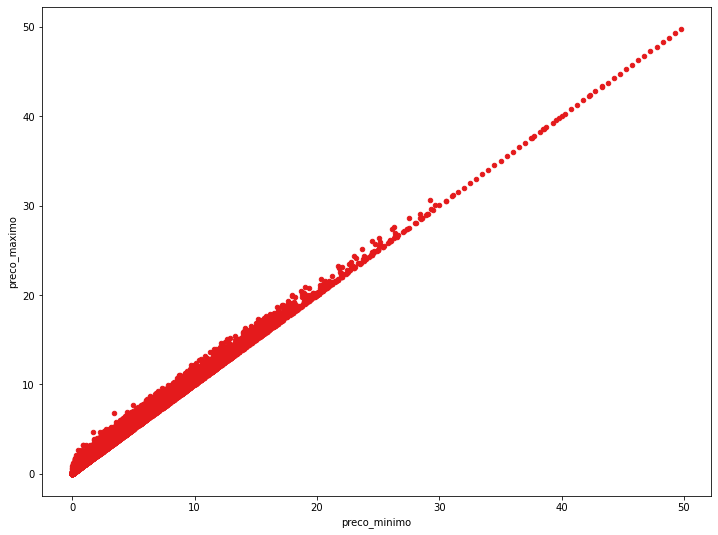

In [266]:
empresa_1.plot.scatter(x="preco_minimo",y="preco_maximo")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='numero_negocios', ylabel='preco_ultimo_negocio'>

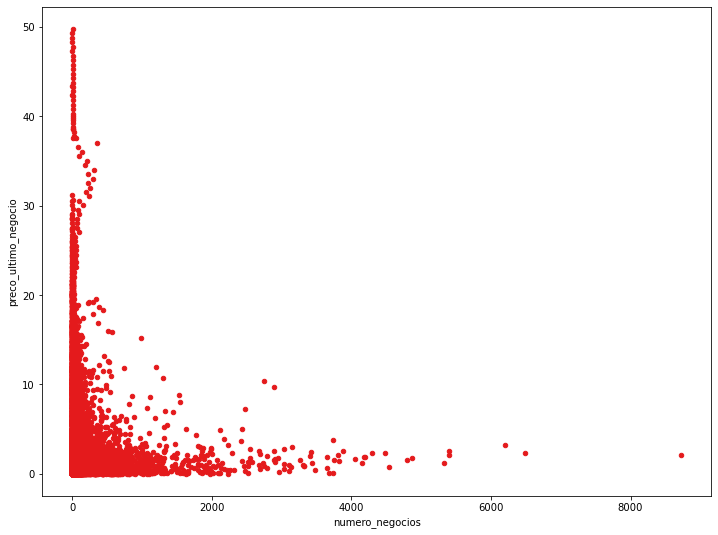

In [267]:
empresa_1.plot.scatter(x="numero_negocios",y="preco_ultimo_negocio")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_ultimo_negocio'>

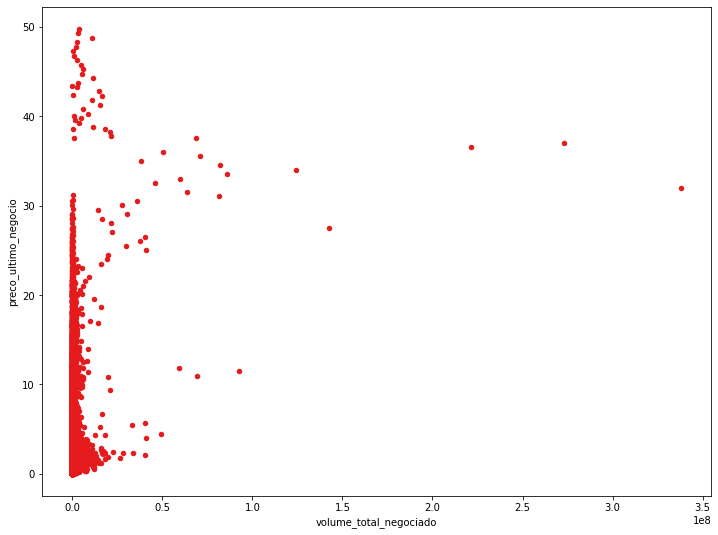

In [268]:
empresa_1.plot.scatter(x="volume_total_negociado",y="preco_ultimo_negocio")

In [269]:
import seaborn as sns
sns.set_palette('Set1')

In [270]:
empresa_2 = dados_acoes[dados_acoes["empresa"] == "VALEE"]
empresa_3 = dados_acoes[dados_acoes["empresa"] == "BBASE"]
empresa_4 = dados_acoes[dados_acoes["empresa"] == "MGLUE"]

In [271]:
empresas = pd.concat([empresa_1, empresa_2, empresa_3, empresa_4])

In [272]:
empresas

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,empresa,especificacao_papel,prazo_dias_merc_termo,preco_abertura,preco_maximo,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
56292,1,20221004,82.0,PETRW358,80,PETRE,ON N2,0.0,0.48,0.48,...,15.0,7500.0,3597.0,29.18,0.0,20221118.0,1.0,0.0,BRPETRACNOR9,196.0
56293,1,20221005,82.0,PETRW358,80,PETRE,ON N2,0.0,0.48,0.48,...,2.0,2000.0,900.0,29.18,0.0,20221118.0,1.0,0.0,BRPETRACNOR9,196.0
56294,1,20221006,82.0,PETRW358,80,PETRE,ON N2,0.0,0.36,0.36,...,3.0,6000.0,1530.0,29.18,0.0,20221118.0,1.0,0.0,BRPETRACNOR9,196.0
56295,1,20221007,82.0,PETRW358,80,PETRE,ON N2,0.0,0.23,0.29,...,17.0,15200.0,3775.0,29.18,0.0,20221118.0,1.0,0.0,BRPETRACNOR9,196.0
56296,1,20221011,82.0,PETRW358,80,PETRE,ON N2,0.0,0.30,0.30,...,1.0,3000.0,900.0,29.18,0.0,20221118.0,1.0,0.0,BRPETRACNOR9,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180541,1,20221011,82.0,MGLUX840,80,MGLUE,ON NM,0.0,7.08,7.08,...,1.0,5500.0,38940.0,12.50,0.0,20221216.0,1.0,0.0,BRMGLUACNOR2,120.0
180542,1,20221019,82.0,MGLUX830,80,MGLUE,ON NM,0.0,7.76,7.76,...,1.0,600.0,4656.0,12.25,0.0,20221216.0,1.0,0.0,BRMGLUACNOR2,120.0
180543,1,20221019,82.0,MGLUX870,80,MGLUE,ON NM,0.0,6.92,6.92,...,1.0,1300.0,8996.0,11.25,0.0,20221216.0,1.0,0.0,BRMGLUACNOR2,120.0
180544,1,20221024,82.0,MGLUX870,80,MGLUE,ON NM,0.0,6.99,6.99,...,1.0,500.0,3495.0,11.25,0.0,20221216.0,1.0,0.0,BRMGLUACNOR2,120.0


In [273]:
#sns.histplot(data=empresas, x="empresa",y="volume_total_negociado",hue="data_pregao", binwidth=3)

<AxesSubplot:xlabel='data_pregao', ylabel='numero_negocios'>

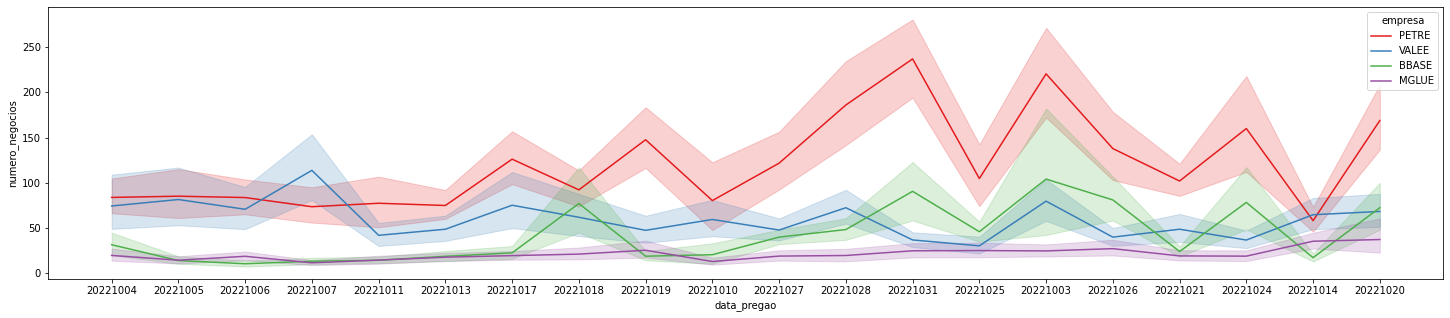

In [274]:
plt.figure(figsize=(25,5))
sns.lineplot(data=empresas, x="data_pregao", y="numero_negocios", hue="empresa")
# Lembrando que 202210 -> mes de outubro em 2022

<AxesSubplot:xlabel='data_pregao', ylabel='preco_ultimo_negocio'>

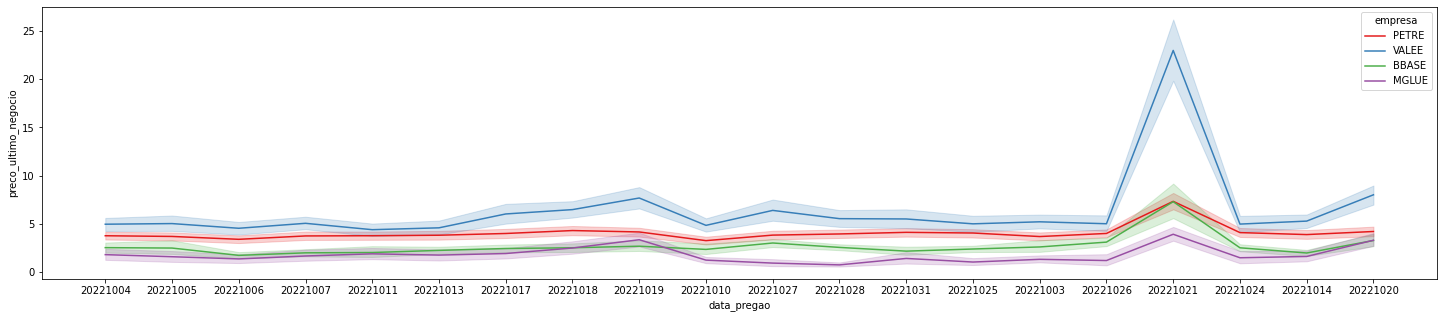

In [275]:
plt.figure(figsize=(25,5))
sns.lineplot(data=empresas, x="data_pregao", y="preco_ultimo_negocio", hue="empresa")

<AxesSubplot:xlabel='data_pregao', ylabel='volume_total_negociado'>

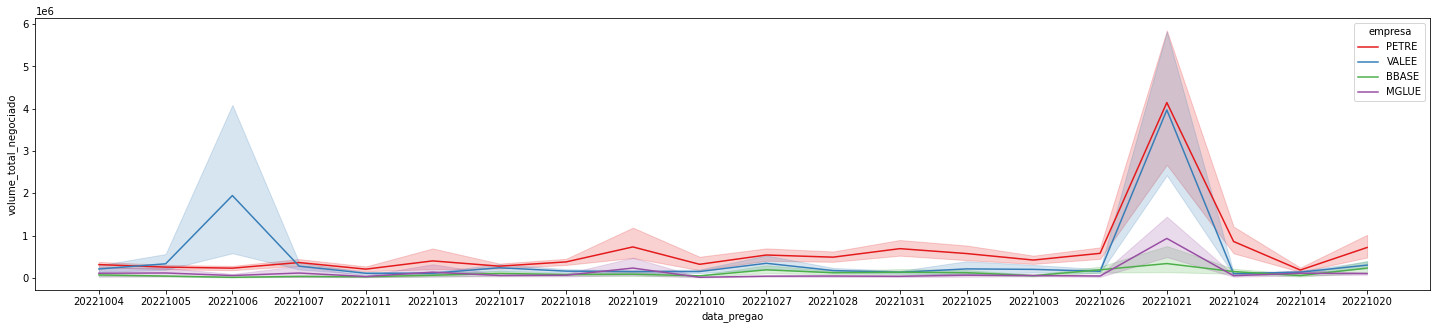

In [276]:
plt.figure(figsize=(25,5))
sns.lineplot(data=empresas, x="data_pregao", y="volume_total_negociado", hue="empresa")

<AxesSubplot:xlabel='data_pregao', ylabel='volume_total_negociado'>

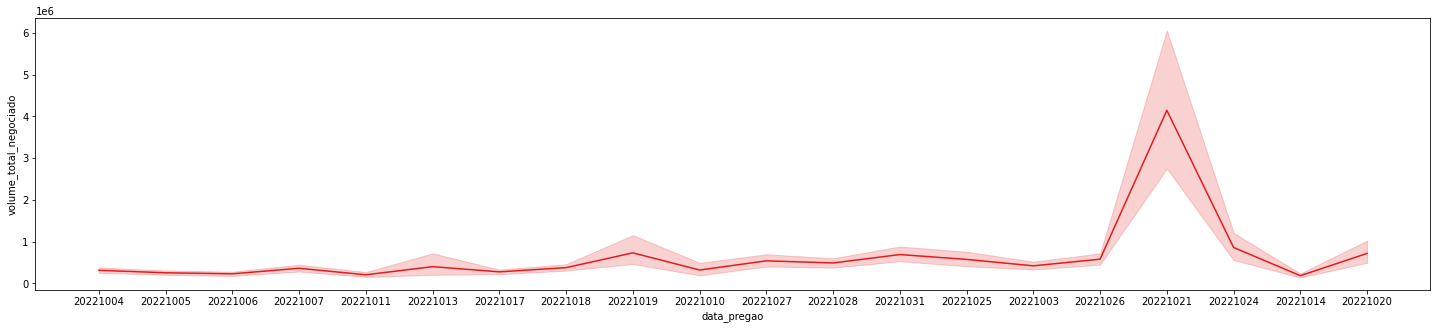

In [277]:
plt.figure(figsize=(25,5))
sns.lineplot(data=empresa_1, x="data_pregao", y="volume_total_negociado")

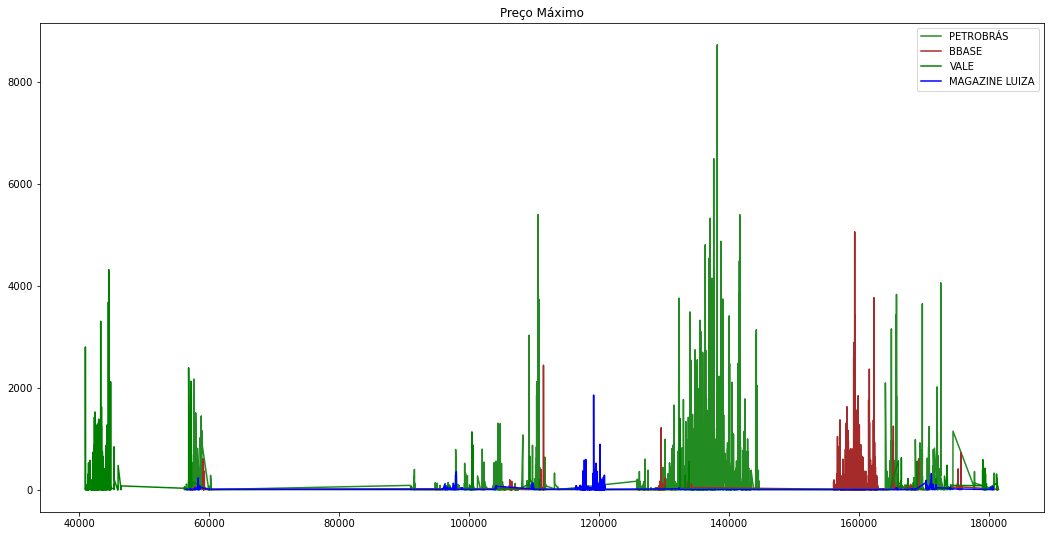

In [278]:
empresa_1['numero_negocios'].plot(label = "PETROBRÁS", color = "forestgreen", figsize = (18,9))
empresa_2['numero_negocios'].plot(label = "BBASE", color = 'brown')
empresa_3['numero_negocios'].plot(label = "VALE", color = 'green')
empresa_4['numero_negocios'].plot(label = "MAGAZINE LUIZA", color = 'blue')



plt.title('Preço Máximo')
plt.legend()
plt.show()

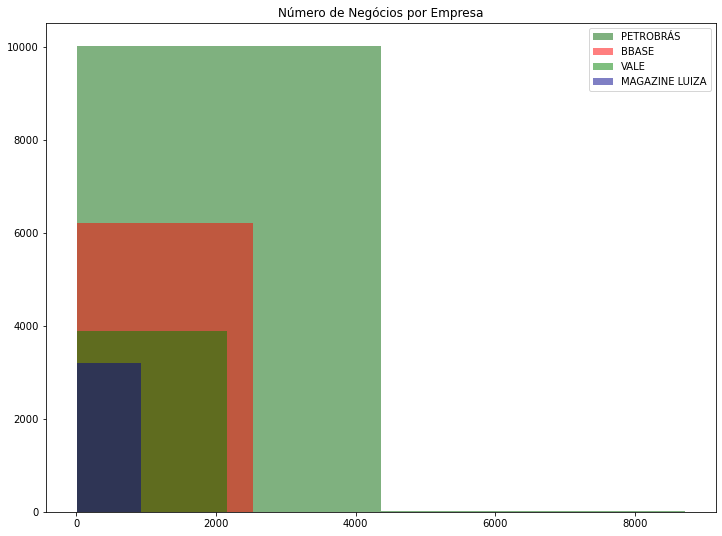

In [279]:
plt.hist(empresa_1['numero_negocios'], alpha=0.5, label='PETROBRÁS', bins=2, color='darkgreen')
plt.hist(empresa_2['numero_negocios'], alpha=0.5, label='BBASE', bins=2, color='red')
plt.hist(empresa_3['numero_negocios'], alpha=0.5, label='VALE', bins=2, color='g')
plt.hist(empresa_4['numero_negocios'], alpha=0.5, label='MAGAZINE LUIZA', bins=2, color='darkblue')
plt.title("Número de Negócios por Empresa")
plt.legend()
matplotlib.rcParams['figure.figsize'] = (12, 9)

<AxesSubplot:xlabel='data_pregao', ylabel='preco_maximo'>

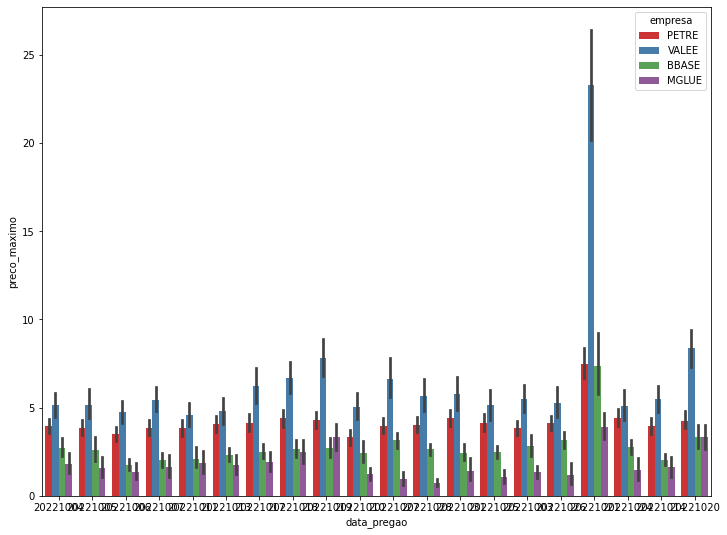

In [280]:
'''df = sns.load_dataset("empresas")'''
sns.barplot(data=empresas, x="data_pregao", y="preco_maximo", hue = "empresa")

In [281]:
fig = px.scatter(empresas, x = 'numero_negocios', y = 'preco_maximo', color = 'empresa', hover_name = "empresa", log_x = True, width = 800)
fig.update_traces(marker=dict(size = 10,line = dict(width = 1)),selector=dict(mode = 'markers'))
fig.update_layout(title = 'Análise de Nº de Negócios vs. Preço Máximo')
fig.update_xaxes(title = 'Nº de Negócios')
fig.update_yaxes(title = 'Preço Máximo')
fig.show()

<AxesSubplot:xlabel='numero_negocios', ylabel='empresa'>

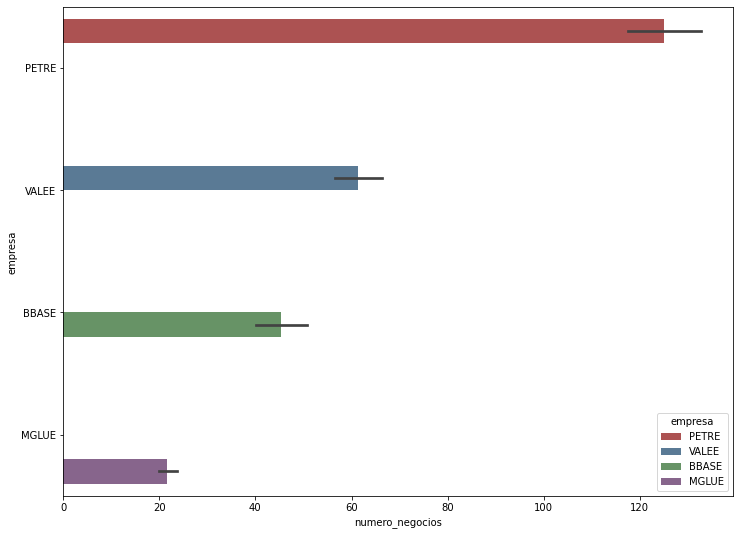

In [314]:
sns.barplot(data=empresas, y="empresa", x="numero_negocios", hue="empresa", saturation=0.45, orient = 'h', linewidth=3)
